In [1]:
# !pip install folium
# !pip install pandas
# !pip install geopandas
# !pip install shapely
# !pip install tqdm

In [2]:
import pandas as pd
import geopandas as gpd
import re
import numpy as np
from tqdm import tqdm, tqdm_notebook
import folium
from shapely.geometry import shape
import shapely.wkt
import json
import urllib.request
import os
import itertools

tqdm.pandas()

In [3]:
GEOJSON_PATH = 'https://datahub.io/core/geo-countries/r/countries.geojson'

with urllib.request.urlopen(GEOJSON_PATH) as url:
    gj = json.loads(url.read().decode())

geo_country = gpd.GeoDataFrame.from_features(gj["features"]).drop('ISO_A3', axis=1)

In [4]:
def weighted(x, cols, w="tests"):
    return pd.Series(np.average(x, weights=x[w], axis=0), cols)

In [5]:
def returnFilePath(year, quart, typ):
    filePath = ''
    for file in os.listdir("new_country_data/{year}/q{quart}_{typ}".format(year=year, quart=quart, typ=typ)):
        if file.endswith(".csv"):
            return os.path.join("new_country_data/{year}/q{quart}_{typ}".format(year=year, quart=quart, typ=typ), file)

In [6]:
def getDFFor(years, quarters, data_types):
    panda_dfs = list()
    for year, quarter, dat_type in list(itertools.product(*[years, quarters, data_types])):
        pd_read = pd.read_csv(returnFilePath(year, quarter, dat_type), 
                              names=["country",
                                     "down_{year}_{quarter}".format(year=year, quarter=quarter),
                                     "upload_{year}_{quarter}".format(year=year, quarter=quarter),
                                     "lat_{year}_{quarter}".format(year=year, quarter=quarter),
                                     "tests_{year}_{quarter}".format(year=year, quarter=quarter),
                                     "devices_{year}_{quarter}".format(year=year, quarter=quarter)
                                    ])
        pd_read = pd_read[pd_read.country != 'NaN']
        pd_read = pd_read.set_index('country')
        panda_dfs.append(pd_read)
    return panda_dfs

In [254]:
panda_dfs = getDFFor([2019, 2020, 2021], [1,2,3,4], ['mobile'])
merged_df = pd.concat(panda_dfs, join="inner", axis=1)
display(merged_df)

,down_2019_1,upload_2019_1,lat_2019_1,tests_2019_1,devices_2019_1,down_2019_2,upload_2019_2,lat_2019_2,tests_2019_2,devices_2019_2,...,down_2021_3,upload_2021_3,lat_2021_3,tests_2021_3,devices_2021_3,down_2021_4,upload_2021_4,lat_2021_4,tests_2021_4,devices_2021_4
country,,,,,,,,,,,,,,,,,,,,,
Chad,8211.474178,6257.760563,128.751174,213,90,8242.211921,7298.894040,93.450331,151,54,...,23372.710526,21870.500000,17.697368,228,106,29091.996303,20059.855823,31.053604,541,195
Russia,19387.229590,9475.710215,47.915787,1380632,713472,20318.180704,9642.715660,46.805107,1425960,760117,...,26638.467604,10230.750428,39.089212,1657294,834872,27949.973499,11171.649993,39.869985,1646933,782578
Paraguay,13488.891759,9025.113989,54.234100,13396,8021,13394.823037,9165.238669,49.677636,13370,7866,...,19003.391612,9362.323153,35.389274,13687,8431,20286.445916,9796.202752,38.967412,11630,7340
Anguilla,15901.164706,7365.117647,70.964706,85,60,21263.175439,8571.438596,72.596491,57,46,...,23071.333333,8957.078431,52.882353,51,29,21189.642857,8943.200000,47.328571,70,23
Yemen,7432.932039,3246.291262,174.776699,103,55,7007.101911,4096.560510,129.057325,157,82,...,7211.994318,5200.581439,73.056818,528,283,10562.969849,5066.529313,60.341709,597,304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
United Kingdom,30871.392975,11953.550958,40.659289,346264,199548,34528.620815,12114.480673,40.890690,340554,191071,...,83278.409462,13320.914835,39.515372,654420,355723,90892.148415,14033.757139,40.176168,615571,332108
Moldova,32987.618689,12377.867182,28.811040,5308,3446,31662.155140,11618.014172,34.370937,5292,3514,...,38861.929928,12518.052837,24.443452,7949,4738,43708.607271,13595.012737,22.342577,7537,4406
Vietnam,21970.361545,12662.394943,30.202991,278007,133819,24782.372086,14121.491932,28.622672,248195,125290,...,38536.267028,19165.363375,26.474782,220973,92772,42207.832216,20607.034067,25.790880,247336,113667


In [255]:
# panda_dfs_extrapolate = getDFFor([2019, 2020], [1,2,3,4], ['fixed'])
# panda_dfs_extrapolate = pd.concat(panda_dfs_extrapolate, join="inner", axis=1)
# mean_data_extrapolate = panda_dfs_extrapolate[['down_2019_1', 'down_2019_2', 'down_2019_3', 'down_2019_4', 'down_2020_1', 'down_2020_2', 'down_2020_3']].mean(axis=0).values
mean_data_extrapolate = np.array([59198.88, 61992.00, 64741.79, 64923.07, 66071.20, 68606.73])
mean_data_extrapolate

array([59198.88, 61992.  , 64741.79, 64923.07, 66071.2 , 68606.73])

In [256]:
# panda_df_down = merged_df.filter(regex=("down.*"))*merged_df[['tests']].values
# mean_data_down = panda_df_down.mean(axis=0).values
panda_df_down = np.array([59198.88, 61992.00, 64741.79, 64923.07, 66071.20, 68606.73, 69830.15, 74610.22, 82329.13, 93603.58, 98552.78, 109324.11])
panda_df_down

array([ 59198.88,  61992.  ,  64741.79,  64923.07,  66071.2 ,  68606.73,
        69830.15,  74610.22,  82329.13,  93603.58,  98552.78, 109324.11])

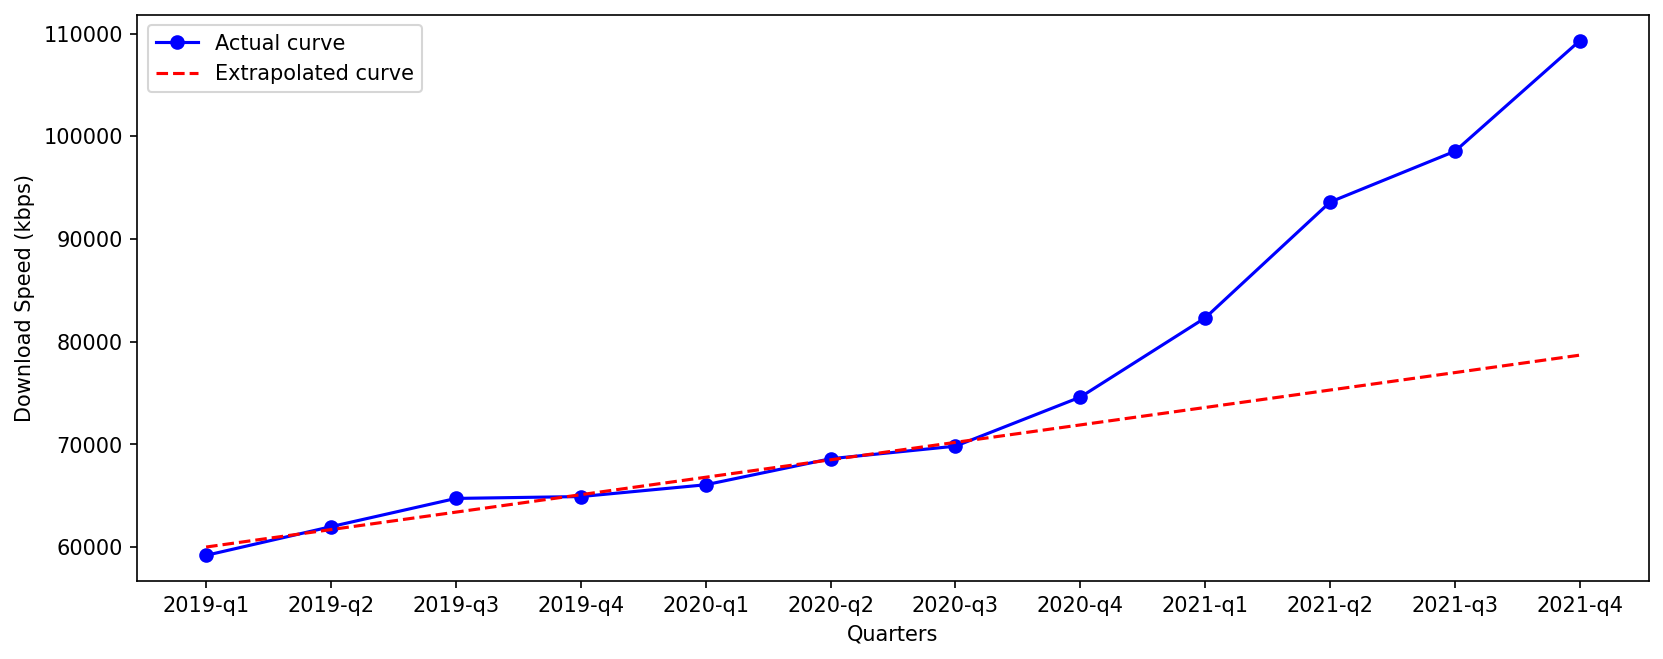

In [257]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

def function(x, a, b):
    return a*np.power(x, 2)+b

xp = np.linspace(1, 12, 100)
p = np.poly1d(np.polyfit(range(1,7), mean_data_extrapolate, 1))
plt.figure(figsize=(13,5), dpi=150)
plt.xlabel('Quarters')
plt.ylabel('Download Speed (kbps)')
plt.xticks(range(1,13), ['2019-q1', '2019-q2', '2019-q3', '2019-q4', '2020-q1', '2020-q2', '2020-q3', '2020-q4', '2021-q1', '2021-q2', '2021-q3', '2021-q4'])
plt.plot(range(1,13), panda_df_down, 'bo-', label='Actual curve')
plt.plot(xp, p(xp), 'r--', label='Extrapolated curve')
plt.legend()
plt.savefig('plot.jpg')

In [258]:
combined_data = merged_df.copy()
combined_data[['diff_d', 'diff_u', 'diff_lat']] = combined_data[['down_2021_4', 'upload_2021_4', 'lat_2021_4']] - combined_data[['down_2019_1', 'upload_2019_1', 'lat_2019_1']].values
combined_data['diff_lat'] = combined_data['diff_lat']

In [259]:
combined_data.loc['Nauru']

down_2019_1       18142.318182
upload_2019_1     12386.454545
lat_2019_1          433.863636
tests_2019_1         22.000000
devices_2019_1        9.000000
                      ...     
tests_2021_4          5.000000
devices_2021_4        3.000000
diff_d            37302.881818
diff_u             2946.945455
diff_lat           -238.863636
Name: Nauru, Length: 63, dtype: float64

In [260]:
def printOverleafTable(index, data):
    for id_type, r in zip(enumerate(data), index):
        print('{idd} & {cont} & {val} \\\\'.format(idd=(id_type[0]+1), cont=r, val=round(id_type[1][0], 2)))
        # print(id_type, r)

In [261]:
printOverleafTable(list(temp.index)[:10], temp.iloc[:10].values)

1 & South Sudan & -540.69 \\
2 & Antarctica & -405.12 \\
3 & Eritrea & -395.0 \\
4 & Solomon Islands & -371.04 \\
5 & Wallis and Futuna & -290.33 \\
6 & Yemen & -190.21 \\
7 & Tonga & -130.31 \\
8 & Niger & -114.5 \\
9 & Venezuela & -103.85 \\
10 & Equatorial Guinea & -96.29 \\


In [262]:
temp = combined_data.iloc[combined_data['diff_d'].values.argsort()][['diff_d']]
temp['diff_d'] = temp['diff_d']/1000
display(temp.iloc[:10])
display(temp[:-11:-1])
printOverleafTable(list(temp.index)[:10], temp.iloc[:10].values)
printOverleafTable(list(temp.index)[:-11:-1], temp[:-11:-1].values)

,diff_d
country,
Djibouti,-24.740162
Samoa,-22.226507
Comoros,-18.343788
Cook Islands,-13.351992
Montenegro,-12.942891
Lebanon,-8.915743
San Marino,-8.788857
New Caledonia,-4.590264
Sri Lanka,-4.512560


,diff_d
country,
United Arab Emirates,339.258972
Cyprus No Mans Area,252.582767
China,228.081134
Cyprus,204.568122
South Korea,185.760971
Kuwait,147.787162
Saudi Arabia,134.554871
Qatar,131.857381
Bulgaria,127.244271


1 & Djibouti & -24.74 \\
2 & Samoa & -22.23 \\
3 & Comoros & -18.34 \\
4 & Cook Islands & -13.35 \\
5 & Montenegro & -12.94 \\
6 & Lebanon & -8.92 \\
7 & San Marino & -8.79 \\
8 & New Caledonia & -4.59 \\
9 & Sri Lanka & -4.51 \\
10 & Equatorial Guinea & -3.52 \\
1 & United Arab Emirates & 339.26 \\
2 & Cyprus No Mans Area & 252.58 \\
3 & China & 228.08 \\
4 & Cyprus & 204.57 \\
5 & South Korea & 185.76 \\
6 & Kuwait & 147.79 \\
7 & Saudi Arabia & 134.55 \\
8 & Qatar & 131.86 \\
9 & Bulgaria & 127.24 \\
10 & Bhutan & 106.84 \\


In [263]:
temp = combined_data.iloc[combined_data['diff_u'].values.argsort()][['diff_u']]
temp['diff_u'] = temp['diff_u']/1000
display(temp.iloc[:10])
display(temp[:-11:-1])
printOverleafTable(list(temp.index)[:10], temp.iloc[:10].values)
printOverleafTable(list(temp.index)[:-11:-1], temp[:-11:-1].values)

,diff_u
country,
Comoros,-7.569678
Djibouti,-7.509061
Samoa,-5.478561
Gambia,-5.009490
Belize,-3.959038
Barbados,-3.933117
Cook Islands,-2.853614
New Caledonia,-2.783094
Federated States of Micronesia,-2.733859


,diff_u
country,
China,35.764805
United Arab Emirates,30.640489
Iraq,20.792221
Dhekelia Sovereign Base Area,19.947923
Brunei,18.922854
Cyprus,17.034707
Cyprus No Mans Area,16.506833
Suriname,14.625729
Qatar,14.462644


1 & Comoros & -7.57 \\
2 & Djibouti & -7.51 \\
3 & Samoa & -5.48 \\
4 & Gambia & -5.01 \\
5 & Belize & -3.96 \\
6 & Barbados & -3.93 \\
7 & Cook Islands & -2.85 \\
8 & New Caledonia & -2.78 \\
9 & Federated States of Micronesia & -2.73 \\
10 & East Timor & -2.48 \\
1 & China & 35.76 \\
2 & United Arab Emirates & 30.64 \\
3 & Iraq & 20.79 \\
4 & Dhekelia Sovereign Base Area & 19.95 \\
5 & Brunei & 18.92 \\
6 & Cyprus & 17.03 \\
7 & Cyprus No Mans Area & 16.51 \\
8 & Suriname & 14.63 \\
9 & Qatar & 14.46 \\
10 & Bosnia and Herzegovina & 14.19 \\


In [264]:
temp = combined_data.iloc[combined_data['diff_lat'].values.argsort()][['diff_lat']]
display(temp.iloc[:10])
display(temp[:-11:-1])
printOverleafTable(list(temp.index)[:10], temp.iloc[:10].values)
printOverleafTable(list(temp.index)[:-11:-1], temp[:-11:-1].values)

,diff_lat
country,
Nauru,-238.863636
American Samoa,-234.822095
South Sudan,-214.039757
Niger,-185.994696
Sao Tome and Principe,-163.491803
Somalia,-156.133374
Yemen,-114.434990
Gibraltar,-112.750000
Chad,-97.697569


,diff_lat
country,
Comoros,103.626245
Greenland,103.221374
British Virgin Islands,21.638062
Djibouti,20.481848
Togo,18.414512
Saint Kitts and Nevis,17.468348
Colombia,12.126768
Central African Republic,9.978571
Dhekelia Sovereign Base Area,8.282051


1 & Nauru & -238.86 \\
2 & American Samoa & -234.82 \\
3 & South Sudan & -214.04 \\
4 & Niger & -185.99 \\
5 & Sao Tome and Principe & -163.49 \\
6 & Somalia & -156.13 \\
7 & Yemen & -114.43 \\
8 & Gibraltar & -112.75 \\
9 & Chad & -97.7 \\
10 & Federated States of Micronesia & -81.49 \\
1 & Comoros & 103.63 \\
2 & Greenland & 103.22 \\
3 & British Virgin Islands & 21.64 \\
4 & Djibouti & 20.48 \\
5 & Togo & 18.41 \\
6 & Saint Kitts and Nevis & 17.47 \\
7 & Colombia & 12.13 \\
8 & Central African Republic & 9.98 \\
9 & Dhekelia Sovereign Base Area & 8.28 \\
10 & Cook Islands & 6.88 \\


In [265]:
combined_data

,down_2019_1,upload_2019_1,lat_2019_1,tests_2019_1,devices_2019_1,down_2019_2,upload_2019_2,lat_2019_2,tests_2019_2,devices_2019_2,...,tests_2021_3,devices_2021_3,down_2021_4,upload_2021_4,lat_2021_4,tests_2021_4,devices_2021_4,diff_d,diff_u,diff_lat
country,,,,,,,,,,,,,,,,,,,,,
Chad,8211.474178,6257.760563,128.751174,213,90,8242.211921,7298.894040,93.450331,151,54,...,228,106,29091.996303,20059.855823,31.053604,541,195,20880.522125,13802.095259,-97.697569
Russia,19387.229590,9475.710215,47.915787,1380632,713472,20318.180704,9642.715660,46.805107,1425960,760117,...,1657294,834872,27949.973499,11171.649993,39.869985,1646933,782578,8562.743909,1695.939778,-8.045802
Paraguay,13488.891759,9025.113989,54.234100,13396,8021,13394.823037,9165.238669,49.677636,13370,7866,...,13687,8431,20286.445916,9796.202752,38.967412,11630,7340,6797.554157,771.088762,-15.266688
Anguilla,15901.164706,7365.117647,70.964706,85,60,21263.175439,8571.438596,72.596491,57,46,...,51,29,21189.642857,8943.200000,47.328571,70,23,5288.478151,1578.082353,-23.636134
Yemen,7432.932039,3246.291262,174.776699,103,55,7007.101911,4096.560510,129.057325,157,82,...,528,283,10562.969849,5066.529313,60.341709,597,304,3130.037810,1820.238051,-114.434990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
United Kingdom,30871.392975,11953.550958,40.659289,346264,199548,34528.620815,12114.480673,40.890690,340554,191071,...,654420,355723,90892.148415,14033.757139,40.176168,615571,332108,60020.755440,2080.206181,-0.483121
Moldova,32987.618689,12377.867182,28.811040,5308,3446,31662.155140,11618.014172,34.370937,5292,3514,...,7949,4738,43708.607271,13595.012737,22.342577,7537,4406,10720.988582,1217.145556,-6.468463
Vietnam,21970.361545,12662.394943,30.202991,278007,133819,24782.372086,14121.491932,28.622672,248195,125290,...,220973,92772,42207.832216,20607.034067,25.790880,247336,113667,20237.470671,7944.639124,-4.412112


In [271]:
m = folium.Map([52.13, 5.29], zoom_start=2)

folium.Choropleth(geo_data = 'countries.geojson',
                  data=combined_data.reset_index(),
                  columns=["country", "diff_d"],
                  key_on='feature.properties.ADMIN',
                  legend_name="Latency decrease (Neg = Increase / Pos = Decrease)",
                  fill_color='BuPu').add_to(m)

# m